<a href="https://colab.research.google.com/github/laneboi/ACSC/blob/master/IBM_DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the summary of course on Data Analysis provided by IBM (DA0101EN).
This notebook can be considered as both training on a different dataset from different area (2018 EPL players transfer values instead of 1985 car prices), and notes in how to perform main steps of data analysis pipeline using pandas, numpy, matplotlib, seaborn, as well as sklearn libraries.

Before starting to code, it is required to import core dependencies: `pandas` and `numpy`.

In [0]:
import pandas as pd
import numpy as np


Suprisingly, some operations need to be performed to have access to the data before getting started.

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# **Step 1: Data Acquisition**
There are different ways to store data sets (like .csv or .xlsx files). But normally pandas.DataFrame objects are used to perform analytic manipulations on data. For that purpose pandas has functions such as `read_csv` or `read_xlsx`. Now, I need to fetch the data set about 2018 EPL players.

In [0]:
path = '/content/gdrive/My Drive/Datasets/epldata_final.csv'
epl_players_df = pd.read_csv(path, header=0) # Zeroth row contains column names -> header=0.

This is a good practice to get known your data before developing a model to explain it. This can be done via pandas.DataFrame.head, pandas.DataFrame.tail, and pandas.DataFrame.describe methods.

In [0]:
epl_players_df.head(5)

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


In [0]:
epl_players_df.tail(5)

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
456,Edimilson Fernandes,West+Ham,21,CM,2,5.0,288,4.5,0.40%,38,2.0,Switzerland,0,1,20,0,1
457,Arthur Masuaku,West+Ham,23,LB,3,7.0,199,4.5,0.20%,34,4.0,Congo DR,0,2,20,0,1
458,Sam Byram,West+Ham,23,RB,3,4.5,198,4.5,0.30%,29,1.0,England,0,2,20,0,0
459,Ashley Fletcher,West+Ham,21,CF,1,1.0,412,4.5,5.90%,16,1.0,England,0,1,20,0,1
460,Diafra Sakho,West+Ham,27,CF,1,10.0,214,5.5,0.10%,12,4.0,Senegal,0,3,20,0,0


In [0]:
epl_players_df.describe(include='all') # Toggle include='all' to include NaN values or not.

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
count,461,461,461.000000,461,461.000000,461.000000,461.000000,461.000000,461,461.000000,460.000000,461,461.000000,461.000000,461.000000,461.000000,461.000000
unique,461,20,NaN,13,NaN,NaN,NaN,NaN,113,NaN,NaN,61,NaN,NaN,NaN,NaN,NaN
top,Joshua King,Huddersfield,NaN,CB,NaN,NaN,NaN,NaN,0.10%,NaN,NaN,England,NaN,NaN,NaN,NaN,NaN
freq,1,28,NaN,85,NaN,NaN,NaN,NaN,64,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,26.804772,NaN,2.180043,11.012039,763.776573,5.447939,NaN,57.314534,1.993478,NaN,0.034707,3.206074,10.334056,0.303688,0.145336
std,NaN,NaN,3.961892,NaN,1.000061,12.257403,931.805757,1.346695,NaN,53.113811,0.957689,NaN,0.183236,1.279795,5.726475,0.460349,0.352822
min,NaN,NaN,17.000000,NaN,1.000000,0.050000,3.000000,4.000000,NaN,0.000000,1.000000,NaN,0.000000,1.000000,1.000000,0.000000,0.000000
25%,NaN,NaN,24.000000,NaN,1.000000,3.000000,220.000000,4.500000,NaN,5.000000,1.000000,NaN,0.000000,2.000000,6.000000,0.000000,0.000000
50%,NaN,NaN,27.000000,NaN,2.000000,7.000000,460.000000,5.000000,NaN,51.000000,2.000000,NaN,0.000000,3.000000,10.000000,0.000000,0.000000
75%,NaN,NaN,30.000000,NaN,3.000000,15.000000,896.000000,5.500000,NaN,94.000000,2.000000,NaN,0.000000,4.000000,15.000000,1.000000,0.000000


Let's see what information I can extract rightaway. First of all this dataset ain't that big - 461 individuals. However, this should not be surprising as EPL is just a sport league with only 20 teams having 20-30 players on average.

Features are `'age'`, `'position_cat'`, `'market_value'`, `'page_views'`, `'fpl_points'`, `'region'`, `'new_foreign'`, `'age_cat'`, `'club_id'`, `'big_club'`, `'new_signing'`. The meaning for some of these seems to be uncertain to me now, so it must be clarified.

The good news about this data set is lack of missing values which simplifies the process, but hinders my personal learning a little.



1.   **age** - age of a player
2.   **position_cat** - numeric representation of primary position on the field:
    *   1 for attackers
    *   2 for midfielders
    *   3 for defenders
    *   4 for goalkeepers
1.   **market_value** - estimated transfer value as on transfermarkt.com on July 20th, 2017
2.   **page_views** - average daily Wikipedia page views from September 1, 2016 to May 1, 2017
1.   **fpl_value** - value in Fantasy Premier League as on July 20th, 2017
2.   **fpl_points** - FPL points accumulated over the previous season
1.   **region**:
    *   1 for England
    *   2 for EU
    *   3 for Americas
    *   4 for Rest of World
2.   **new_foreign** - whether a new signing from a different league, for 2017/18 (till 20th July)
1.   **age_cat**
2.   **club_id**
1.   **big_club** - whether one of the Top 6 clubs (Arsenal, Chelsea, Liverpool, Manchester City, Manchester United, Tottenham Hotspurs)
2.   **new_signing** - whether a new signing for 2017/18 (till 20th July)

## Basic Insight of Dataset
After reading data into Pandas dataframe, it is time for us to explore the dataset.
There are several ways to obtain essential insights of the data to help us better understand our dataset.

In [0]:
epl_players_df.dtypes

name             object
club             object
age               int64
position         object
position_cat      int64
market_value    float64
page_views        int64
fpl_value       float64
fpl_sel          object
fpl_points        int64
region          float64
nationality      object
new_foreign       int64
age_cat           int64
club_id           int64
big_club          int64
new_signing       int64
dtype: object

Let's describe a data series comprising features `'age'`, `'page_views'`, and `'market_value'`.

In [0]:
epl_players_df[['age', 'page_views', 'market_value']].describe()

,age,page_views,market_value
count,461.000000,461.000000,461.000000
mean,26.804772,763.776573,11.012039
std,3.961892,931.805757,12.257403
min,17.000000,3.000000,0.050000
25%,24.000000,220.000000,3.000000
50%,27.000000,460.000000,7.000000
75%,30.000000,896.000000,15.000000
max,38.000000,7664.000000,75.000000


The last method to make an insight of a dataset is using pandas.DataFrame.info parameter.

In [0]:
epl_players_df.info

<bound method DataFrame.info of                         name         club  age position  position_cat  \
0             Alexis Sanchez      Arsenal   28       LW             1   
1                 Mesut Ozil      Arsenal   28       AM             1   
2                  Petr Cech      Arsenal   35       GK             4   
3               Theo Walcott      Arsenal   28       RW             1   
4          Laurent Koscielny      Arsenal   31       CB             3   
5            Hector Bellerin      Arsenal   22       RB             3   
6             Olivier Giroud      Arsenal   30       CF             1   
7              Nacho Monreal      Arsenal   31       LB             3   
8           Shkodran Mustafi      Arsenal   25       CB             3   
9                 Alex Iwobi      Arsenal   21       LW             1   
10              Granit Xhaka      Arsenal   24       DM             2   
11   Alex Oxlade-Chamberlain      Arsenal   23       RM             2   
12             Jack

# Step 2: Data Wrangling aka Data Cleaning
The process of converting initial data to a format that may be more suitable for analysis is called data wrangling. This dataset has already been cleaned.

Missing values was replaced by executing `epl_players_df.replace('?', np.nan, inplace=True`). This can be easily proven running the code below. If though there were missing values that should have been deleted, don't forget to execute `epl_players_df.reset_index(drop=True, inplace=True)`.

Missing values can be treated as follows:
*   delete an entire row
*   delete an entire column
*   replace with some value (mean, most common, ets)
*   ignore

Replacing with average value is a good approach when dealing with continuous values like number of views on Wikipedia page. Use of most common values (statistical mode) is more preferrable when it comes to discrete variable such as position category. The important restriction here is that it's not allowed to do so with target value. After all we are trying to predict an accurate answer. 

In [0]:
missing_data = epl_players_df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print()

name
False    461
Name: name, dtype: int64

club
False    461
Name: club, dtype: int64

age
False    461
Name: age, dtype: int64

position
False    461
Name: position, dtype: int64

position_cat
False    461
Name: position_cat, dtype: int64

market_value
False    461
Name: market_value, dtype: int64

page_views
False    461
Name: page_views, dtype: int64

fpl_value
False    461
Name: fpl_value, dtype: int64

fpl_sel
False    461
Name: fpl_sel, dtype: int64

fpl_points
False    461
Name: fpl_points, dtype: int64

region
False    460
True       1
Name: region, dtype: int64

nationality
False    461
Name: nationality, dtype: int64

new_foreign
False    461
Name: new_foreign, dtype: int64

age_cat
False    461
Name: age_cat, dtype: int64

club_id
False    461
Name: club_id, dtype: int64

big_club
False    461
Name: big_club, dtype: int64

new_signing
False    461
Name: new_signing, dtype: int64



Instead of using strings for representation of the player's position, initial values has been mapped to integers from 1 to 4. If they hadn't, I could run `epl_players_df[['position_cat']] = epl_players_df[['position_cat']].astype("int")`

## Data Standardization
The next step is about converting data into a common format. This is important to make meaningful comparisons. Assume we develop a model for English football managers to predict transfer values. Therefore, it is more suitable for English managers to deal with prices expressed in Pounds, so we need to convert `'market_value'` into `'market_value_gpb'`.

This is an example of data transformation.

In [0]:
conversion_coefficient = 0.8904   # Average value on 20th July, 2017 taken from www.poundsterlinglive.com
epl_players_df['market_value'] *= conversion_coefficient
epl_players_df.rename(columns={'market_value':'transfer_value_gbp'}, inplace=True)
epl_players_df.head()

,name,club,age,position,position_cat,transfer_value_gbp,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,57.8760,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,44.5200,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,6.2328,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,17.8080,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,19.5888,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


## Data Binning
Binning or bucketization of data is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis.

Text(0.5, 1.0, 'Transfer value bins')

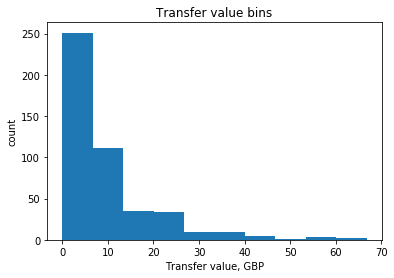

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(epl_players_df['transfer_value_gbp'])
plt.xlabel('Transfer value, GBP')
plt.ylabel('count')
plt.title('Transfer value bins')

In [0]:
# Number 4 represents bins edges, not bins!
bins = np.linspace(min(epl_players_df['transfer_value_gbp']), max(epl_players_df['transfer_value_gbp']), 4)
bins

array([4.452000e-02, 2.228968e+01, 4.453484e+01, 6.678000e+01])

Now it's time to apply the `cut` function to determine what category each value belongs to.

In [0]:
group_names = ['Low', 'Medium', 'Height']
epl_players_df['transfer_value_gbp_binned'] = pd.cut(epl_players_df['transfer_value_gbp'], bins, labels=group_names, include_lowest=True)
epl_players_df[['transfer_value_gbp_binned']].head(5)

,transfer_value_gbp_binned
0,Height
1,Medium
2,Low
3,Low
4,Low


Let's see the number of players in each bin.

In [0]:
epl_players_df['transfer_value_gbp_binned'].value_counts()

Low       409
Medium     46
Height      6
Name: transfer_value_gbp_binned, dtype: int64

Let's plot the distribution of bins.

Text(0.5, 1.0, 'Transfer value bins')

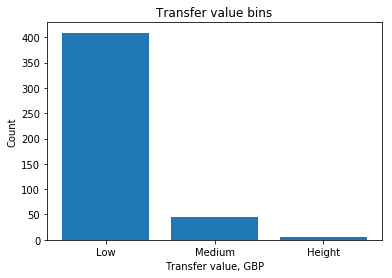

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(group_names, epl_players_df['transfer_value_gbp_binned'].value_counts())

plt.xlabel('Transfer value, GBP')
plt.ylabel('Count')
plt.title('Transfer value bins')

## Bins visualization
Normally, a histogram is used to visualize the distribution of bins created above.

Text(0.5, 1.0, 'Transfer value bins')

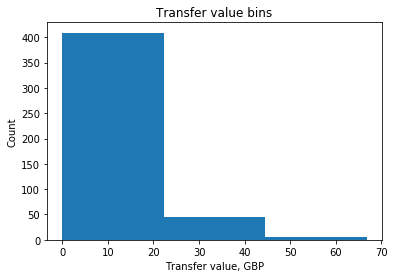

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt


a = (0,1,2)

# draw historgram of attribute "transfer_value_gbp_binned" with bins = 3
plt.hist(epl_players_df["transfer_value_gbp"], bins = 3)

# set x/y labels and plot title
plt.xlabel("Transfer value, GBP")
plt.ylabel("Count")
plt.title("Transfer value bins")

## Indicator Variables or Dummy Variables
An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning.

So categorical variables can be used for regression analysis later.

What variables are good candidates to do that? First, let's see what columns we have already.

In [0]:
epl_players_df.columns

Index(['name', 'club', 'age', 'position', 'position_cat', 'transfer_value_gbp',
       'page_views', 'fpl_value', 'fpl_sel', 'fpl_points', 'region',
       'nationality', 'new_foreign', 'age_cat', 'club_id', 'big_club',
       'new_signing', 'transfer_value_gbp_binned'],
      dtype='object')

There are some dummy variables already: `'new_foreign'`, `'big_club'`, etc.`'position'` seems to be the right choice.

In [0]:
position_dummy = pd.get_dummies(epl_players_df['position'])
position_dummy.head(5)

,AM,CB,CF,CM,DM,GK,LB,LM,LW,RB,RM,RW,SS
0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0


Now it's just about time to join new dummy variables with the original dataframe and drop the old feature.

In [0]:
# Axis=1 indicates that only columns should be added and deleted.
epl_players_df = pd.concat([epl_players_df, position_dummy], axis=1)
# epl_players_df.drop('position', axis=1, inplace=True)

In [0]:
epl_players_df.head()

,name,club,age,position,position_cat,transfer_value_gbp,page_views,fpl_value,fpl_sel,fpl_points,...,CM,DM,GK,LB,LM,LW,RB,RM,RW,SS
0,Alexis Sanchez,Arsenal,28,LW,1,57.8760,4329,12.0,17.10%,264,...,0,0,0,0,0,1,0,0,0,0
1,Mesut Ozil,Arsenal,28,AM,1,44.5200,4395,9.5,5.60%,167,...,0,0,0,0,0,0,0,0,0,0
2,Petr Cech,Arsenal,35,GK,4,6.2328,1529,5.5,5.90%,134,...,0,0,1,0,0,0,0,0,0,0
3,Theo Walcott,Arsenal,28,RW,1,17.8080,2393,7.5,1.50%,122,...,0,0,0,0,0,0,0,0,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,19.5888,912,6.0,0.70%,121,...,0,0,0,0,0,0,0,0,0,0


# Step 3: Exploratory Data Analysis
## Analyzing Individual Feature Patterns Using Visualization
To install seaborn we use the pip which is the python package manager.

In [0]:
%%capture
!pip install seaborn

Import dependencies and specify `%matplotlib inline` to plot in notebook.



In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

How to choose the right visualization method?

When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable.

In [0]:
print(epl_players_df.dtypes)

name                           object
club                           object
age                             int64
position                       object
position_cat                    int64
transfer_value_gbp            float64
page_views                      int64
fpl_value                     float64
fpl_sel                        object
fpl_points                      int64
region                        float64
nationality                    object
new_foreign                     int64
age_cat                         int64
club_id                         int64
big_club                        int64
new_signing                     int64
transfer_value_gbp_binned    category
AM                              uint8
CB                              uint8
CF                              uint8
CM                              uint8
DM                              uint8
GK                              uint8
LB                              uint8
LM                              uint8
LW          

For example, I can calculate the correlation between variables of type `int64` or `float64` using the method `corr`:

In [0]:
epl_players_df[['page_views', 'age', 'transfer_value_gbp']].corr()

,page_views,age,transfer_value_gbp
page_views,1.000000,-0.048682,0.739657
age,-0.048682,1.000000,-0.132396
transfer_value_gbp,0.739657,-0.132396,1.000000


Continuous numerical variables are variables that may contain any value within some range. Continuous numerical variables can have the type `int64` or `float64`. A great way to visualize these variables is by using scatterplots with fitted lines.

In order to start understanding the (linear) relationship between an individual variable and the price. We can do this by using `seaborn.regplot`, which plots the scatterplot plus the fitted regression line for the data.

(0, 93.7570148947696)

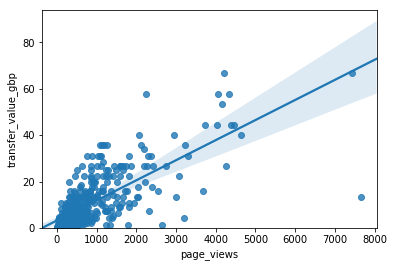

In [0]:
sns.regplot(x='page_views', y='transfer_value_gbp', data=epl_players_df)
plt.ylim(0,)

As the `'page_views'` goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.

We can examine that the correlation between these variables is approximately 0.7397

In [0]:
epl_players_df[['page_views', 'transfer_value_gbp']].corr()

,page_views,transfer_value_gbp
page_views,1.000000,0.739657
transfer_value_gbp,0.739657,1.000000


FPL value and FPL points are potential predictors of transfer value.

(0, 70.29952776388932)

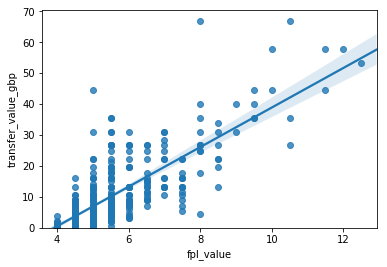

In [0]:
sns.regplot(x='fpl_value', y='transfer_value_gbp', data=epl_players_df)
plt.ylim(0,)

In [0]:
epl_players_df[['fpl_value', 'transfer_value_gbp']].corr()

,fpl_value,transfer_value_gbp
fpl_value,1.000000,0.788653
transfer_value_gbp,0.788653,1.000000


(0, 70.15333928155992)

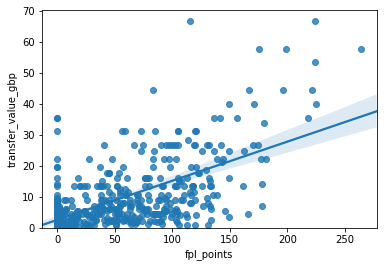

In [0]:
sns.regplot(x='fpl_points', y='transfer_value_gbp', data=epl_players_df)
plt.ylim(0,)

In [0]:
epl_players_df[['fpl_points', 'transfer_value_gbp']].corr()

,fpl_points,transfer_value_gbp
fpl_points,1.000000,0.615155
transfer_value_gbp,0.615155,1.000000


There are also weak predictors that poorly correlate with transfer value. For instance, we can recall `'age'`. This is probably because its variance isn't that hight and the feature needs to be binned.

(0, 70.13314292201304)

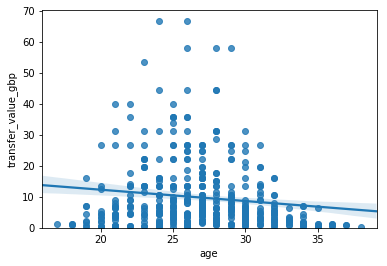

In [0]:
sns.regplot(x='age', y='transfer_value_gbp', data=epl_players_df)
plt.ylim(0,)

Let's find it out!

## Bucketization of Age Feature (Unplanned)

In [0]:
bins = np.linspace(min(epl_players_df['age']), max(epl_players_df['age']), 4)
age_groups = ['Young', 'Middle', 'Senior']
epl_players_df['age_binned'] = pd.cut(epl_players_df['age'], bins, labels=age_groups, include_lowest=True)
epl_players_df['age_binned'].value_counts()

Middle    276
Young     126
Senior     59
Name: age_binned, dtype: int64

Text(0.5, 1.0, 'Age bins')

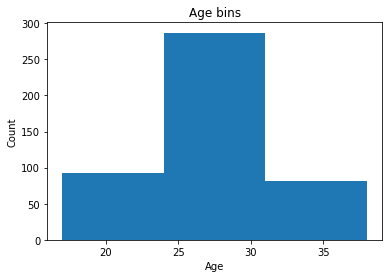

In [0]:
a = (0,1,2)
plt.hist(epl_players_df["age"], bins = 3)

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age bins')

## Categorical Variables

Let's explore the variances of transfer values depending on player's position.

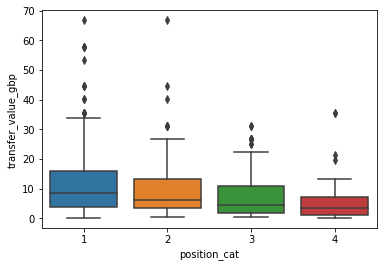

In [0]:
sns.boxplot(x='position_cat', y='transfer_value_gbp', data=epl_players_df)

## Descriptive Statistical Analysis
Let's first take a look at the variables by utilizing a description method.

The describe function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.

This will show:

*   the count of that variable
*   the mean
*   the standard deviation (std)
*   the minimum value
*   the IQR (Interquartile Range: 25%, 50% and 75%)
*   the maximum value







In [0]:
epl_players_df.describe()

,age,position_cat,transfer_value_gbp,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,...,CM,DM,GK,LB,LM,LW,RB,RM,RW,SS
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,460.000000,461.000000,461.000000,461.000000,...,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,26.804772,2.180043,9.805120,763.776573,5.447939,57.314534,1.993478,0.034707,3.206074,10.334056,...,0.136659,0.078091,0.091106,0.075922,0.017354,0.078091,0.073753,0.010846,0.069414,0.015184
std,3.961892,1.000061,10.913992,931.805757,1.346695,53.113811,0.957689,0.183236,1.279795,5.726475,...,0.343861,0.268606,0.288073,0.265161,0.130727,0.268606,0.261652,0.103690,0.254433,0.122419
min,17.000000,1.000000,0.044520,3.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,1.000000,2.671200,220.000000,4.500000,5.000000,1.000000,0.000000,2.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,2.000000,6.232800,460.000000,5.000000,51.000000,2.000000,0.000000,3.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,30.000000,3.000000,13.356000,896.000000,5.500000,94.000000,2.000000,0.000000,4.000000,15.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,38.000000,4.000000,66.780000,7664.000000,12.500000,264.000000,4.000000,1.000000,6.000000,20.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


By default this method doesn't include variables of `object` data type. This can be avoided as follows:

In [0]:
epl_players_df.describe(include=['object'])

,name,club,position,fpl_sel,nationality
count,461,461,461,461,461
unique,461,20,13,113,61
top,Joshua King,Huddersfield,CB,0.10%,England
freq,1,28,85,64,156


## Grouping
The `groupby` method groups data by different categories. The data is grouped based on one or several variables and analysis is performed on the individual groups.

In [0]:
epl_players_df['position_cat'].unique()

array([1, 4, 3, 2])

We can group players in complex categories based on multiple features like `'club'`, `'position_cat'`, and `'transfer_value_gbp'`.

In [0]:
players_group_one = epl_players_df[['club', 'position_cat', 'transfer_value_gbp']]
players_group_one = players_group_one.groupby(['club', 'position_cat'], as_index=False).mean()
players_group_one

,club,position_cat,transfer_value_gbp
0,Arsenal,1,26.378100
1,Arsenal,2,18.698400
2,Arsenal,3,13.445040
3,Arsenal,4,4.452000
4,Bournemouth,1,5.654040
5,Bournemouth,2,3.005100
6,Bournemouth,3,3.879600
7,Bournemouth,4,2.968000
8,Brighton+and+Hove,1,2.639400
9,Brighton+and+Hove,2,2.114700


This grouped data is much easier to visualize when it is made into a pivot table. A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. We can convert the dataframe to a pivot table using the method `pivot` to create a pivot table from the groups.

In [0]:
grouped_pivot = players_group_one.pivot(index='position_cat', columns='club')
grouped_pivot

transfer_value_gbp                                          \
club                    Arsenal Bournemouth Brighton+and+Hove   Burnley   
position_cat                                                              
1                      26.37810     5.65404            2.6394  4.340700   
2                      18.69840     3.00510            2.1147  3.923325   
3                      13.44504     3.87960            2.1306  2.226000   
4                       4.45200     2.96800            1.6695  3.561600   

                                                                              \
club           Chelsea Crystal+Palace    Everton Huddersfield Leicester+City   
position_cat                                                                   
1             31.17142         9.7944  11.327867     2.347418        13.8648   
2             27.42432         8.2362  10.313800     1.246560         7.1232   
3             18.82560         4.8972   6.833820     1.104096         3.5616   
4             18.47580         1.8921   6.529600     0.779100         4.6746   

                                                                            \
club          Liverpool Manchester+City Manchester+United Newcastle+United   
position_cat                                                                 
1             18.496036        36.17250          25.97000           5.1834   
2             14.098000        14.60256          18.69840           6.9006   
3             10.796100        22.61616          14.86968           3.5616   
4              8.904000        13.35600          13.68248           2.4486   

                                                                            \
club         Southampton Stoke+City  Swansea Tottenham   Watford West+Brom   
position_cat                                                                 
1              10.748400    7.40145  5.80986   25.9700  6.105600   7.12320   
2               6.773400    6.41088  5.11980   20.3308  5.713400   3.60612   
3               8.597925    4.00680  3.65700   17.8080  3.314267   3.47256   
4              13.356000    7.12320  4.67460   12.4656  1.780800   2.44860   

                        
club          West+Ham  
position_cat            
1             10.23960  
2              7.34580  
3              6.51105  
4              4.67460

Let's build a heatmap to visualize the summary.

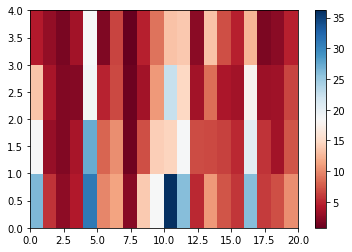

In [0]:
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

The default labels convey no useful information to us. Let's change that:

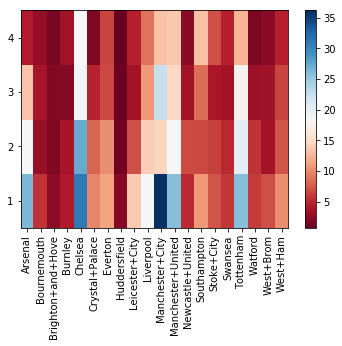

In [0]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

row_labels = grouped_pivot.columns.levels[1]
column_labels = grouped_pivot.index

ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(column_labels, minor=False)

plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

Honestly, I think I have made a series of bad decisions about this data set. For example, I bucketized transfer value which is useless since I'm trying to predict the transfer value. Okay, I'll fix it later, nothing comes perfect at the first try!

## Correlation and Causation
Correlation: a measure of the extent of interdependence between variables.

Causation: the relationship between cause and effect between two variables.

It is important to know the difference between these two and that correlation does not imply causation. Determining correlation is much simpler the determining causation as causation may require independent experimentation.

**Pearson Correlation**

The Pearson Correlation measures the linear dependence between two variables X and Y.

The resulting coefficient is a value between -1 and 1 inclusive, where:

1: Total positive linear correlation.
0: No linear correlation, the two variables most likely do not affect each other.
-1: Total negative linear correlation.
Pearson Correlation is the default method of the function `corr`. Like before we can calculate the Pearson Correlation of the of the `int64` or `float64` variables.

In [0]:
epl_players_df.corr()

,age,position_cat,transfer_value_gbp,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,...,CM,DM,GK,LB,LM,LW,RB,RM,RW,SS
age,1.000000,0.220678,-0.132396,-0.048682,-0.097659,0.187785,0.086430,-0.125400,0.972199,-0.002868,...,-0.007501,0.000058,0.221331,-0.039663,0.073713,-0.112296,0.057959,-0.037169,-0.087886,-0.034215
position_cat,0.220678,1.000000,-0.217637,-0.279432,-0.491800,-0.084682,-0.062474,0.001415,0.196853,-0.016599,...,-0.071705,-0.052454,0.576798,0.235269,-0.023951,-0.343795,0.214996,-0.018872,-0.322618,-0.146678
transfer_value_gbp,-0.132396,-0.217637,1.000000,0.739657,0.788653,0.615155,0.101659,0.098056,-0.117682,-0.046068,...,-0.001681,0.031737,-0.097678,-0.063489,-0.076105,0.054220,-0.075347,-0.003524,0.026394,0.003500
page_views,-0.048682,-0.279432,0.739657,1.000000,0.730640,0.542464,0.031055,-0.049725,-0.041672,-0.092409,...,0.009397,-0.005793,-0.082182,-0.099899,-0.048725,0.065386,-0.091353,0.024257,-0.014560,0.152834
fpl_value,-0.097659,-0.491800,0.788653,0.730640,1.000000,0.618837,0.082429,0.108650,-0.082056,-0.060884,...,-0.062062,-0.144990,-0.186677,-0.095444,-0.038076,0.134463,-0.106300,0.011836,0.112082,0.090517
fpl_points,0.187785,-0.084682,0.615155,0.542464,0.618837,1.000000,-0.006712,-0.204837,0.176572,0.041094,...,-0.050327,-0.037229,-0.005571,-0.015283,-0.028966,0.049473,0.019914,-0.036936,-0.006284,0.029354
region,0.086430,-0.062474,0.101659,0.031055,0.082429,-0.006712,1.000000,0.050903,0.089980,0.068671,...,-0.109649,0.069673,0.025829,0.001956,-0.051243,0.086595,-0.093616,0.000715,0.064388,0.000847
new_foreign,-0.125400,0.001415,0.098056,-0.049725,0.108650,-0.204837,0.050903,1.000000,-0.113998,-0.002786,...,-0.006436,0.033151,-0.018850,-0.009609,-0.025199,-0.055187,-0.008164,-0.019856,0.041471,-0.023545
age_cat,0.972199,0.196853,-0.117682,-0.041672,-0.082056,0.176572,0.089980,-0.113998,1.000000,-0.004668,...,-0.019674,0.010000,0.214310,-0.059017,0.082529,-0.097506,0.064878,-0.033261,-0.064054,-0.033892
club_id,-0.002868,-0.016599,-0.046068,-0.092409,-0.060884,0.041094,0.068671,-0.002786,-0.004668,1.000000,...,-0.004466,0.022576,-0.013218,-0.032488,-0.004857,-0.001450,0.011088,-0.057371,0.030304,-0.001049


sometimes we would like to know the significant of the correlation estimate.

**P-value**:

What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

By convention, when

*   the p-value is  <  0.001: we say there is strong evidence that the correlation is significant.
*   the p-value is  <  0.05: there is moderate evidence that the correlation is significant.
*   the p-value is  <  0.1: there is weak evidence that the correlation is significant.
*   the p-value is  >  0.1: there is no evidence that the correlation is significant.

We can obtain this information using `stats` module in the `scipy` library.

In [0]:
from scipy import stats

Let's calculate the parameters of Pearson correlation between tranfer value and page views.

In [0]:
pearson_coef, p_value = stats.pearsonr(epl_players_df['transfer_value_gbp'], epl_players_df['page_views'])
print(f'The Pearson correlation shows {pearson_coef} correlation coefficient with {p_value} uncertainty.')

The Pearson correlation shows 0.7396565249278071 correlation coefficient with 5.6928972600385365e-81 uncertainty.


Let's explore Pearson correlations for transfer value with each other parameter iteratively.

In [0]:
epl_players_df['name'].dtype == 'O'

True

In [0]:
for var in filter(lambda x: epl_players_df[x].dtype in ['int64', 'float64'], epl_players_df.columns):
    pearson_coef, p_value = stats.pearsonr(epl_players_df[var], epl_players_df['transfer_value_gbp'])
    print(f'The correlation between transfer value and\n\t{var} is {pearson_coef} with {p_value} of uncertainty.')
    print()

The correlation between transfer value and
	age is -0.13239623149378973 with 0.0044064776673862875 of uncertainty.

The correlation between transfer value and
	position_cat is -0.21763671559096162 with 2.395496887025554e-06 of uncertainty.

The correlation between transfer value and
	transfer_value_gbp is 1.0 with 0.0 of uncertainty.

The correlation between transfer value and
	page_views is 0.7396565249278071 with 5.6928972600385365e-81 of uncertainty.

The correlation between transfer value and
	fpl_value is 0.7886534125526207 with 5.1821462933788865e-99 of uncertainty.

The correlation between transfer value and
	fpl_points is 0.6151545320799908 with 2.446999244354544e-49 of uncertainty.

The correlation between transfer value and
	region is nan with 1.0 of uncertainty.

The correlation between transfer value and
	new_foreign is 0.0980559953926461 with 0.035316552098352674 of uncertainty.

The correlation between transfer value and
	age_cat is -0.11768197721169629 with 0.01144951191

These results signify that correlations of transfer value with `'page_views'` and `'fpl_value'` features are the strongest ones. These are statistically significant since p-values have orders of -81 and -99 respectively.

## ANOVA (ANalysis Of VAriance)
The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:

**F-test score**: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.

**P-value**: P-value tells how statistically significant is our calculated score value.

If our transfer value variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.

Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, there is no need to take the average before hand.

In [0]:
grouped_test = epl_players_df[['page_views', 'fpl_value', 'position', 'transfer_value_gbp']].groupby(['position'], as_index=False)
grouped_test.head()

,page_views,fpl_value,position,transfer_value_gbp
0,4329,12.0,LW,57.8760
1,4395,9.5,AM,44.5200
2,1529,5.5,GK,6.2328
3,2393,7.5,RW,17.8080
4,912,6.0,CB,19.5888
5,1675,6.0,RB,26.7120
6,2230,8.5,CF,19.5888
7,555,5.5,LB,11.5752
8,1877,5.5,CB,26.7120
9,1812,5.5,LW,8.9040


Now, the function `f_oneway` in the module `stats` to obtain the **F-test** score and **P-value**.

In [0]:
from itertools import combinations
for pair in combinations(['GK', 'CB', 'CM', 'CF'], 2):
    f_val, p_val = stats.f_oneway(grouped_test.get_group(pair[0])['transfer_value_gbp'], grouped_test.get_group(pair[1])['transfer_value_gbp'])
    print(f'ANOVA results between {pair[0]!r} and {pair[1]!r}: F={f_val}, p={p_val}\n')

ANOVA results between 'GK' and 'CB': F=0.9568558935121805, p=0.3298696715109467

ANOVA results between 'GK' and 'CM': F=2.6354019479900606, p=0.1075623304549399

ANOVA results between 'GK' and 'CF': F=7.050372402842449, p=0.009209644385952932

ANOVA results between 'CB' and 'CM': F=1.1898308107479927, p=0.27716060836001416

ANOVA results between 'CB' and 'CF': F=6.221811624050442, p=0.013748834713789017

ANOVA results between 'CM' and 'CF': F=1.4138654369436052, p=0.2367249641786775



# Step 4: Model Development
In this section, I will develop several models that will predict the price of the player using the variables or features.

## Linear Regression
The result of Linear Regression is a linear function that predicts the response (dependent) variable as a function of the predictor (independent) variable.

In [0]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

After creating a model it should be trained with data.

In [0]:
X = epl_players_df[['page_views']]
Y = epl_players_df['transfer_value_gbp']

linear_model.fit(X, Y)

Yhat = linear_model.predict(X)
Yhat[:5]

print(f'The characteristics of obtained linear function:')
print(f'\tintercept={linear_model.intercept_}, slope={linear_model.coef_[0]}')

The characteristics of obtained linear function:
	intercept=3.1882183882824684, slope=0.008663398976435118


## Multiple Linear Regression
If we want to use more variables in our model to predict car price, we can use Multiple Linear Regression. Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and two or more predictor (independent) variables. Most of the real-world regression models involve multiple predictors.

In [0]:
Z = epl_players_df[['page_views', 'position_cat', 'fpl_value']]
linear_model.fit(Z, epl_players_df['transfer_value_gbp'])
      
print(f'The characteristics of obtained linear function:')
print(f'\tintercept={linear_model.intercept_}, slope={linear_model.coef_}')

The characteristics of obtained linear function:
	intercept=-26.298061273591678, slope=[3.72292933e-03 2.08479624e+00 5.27075413e+00]


## Residual Plot
A good way to visualize the variance of the data is to use a residual plot.

What is a residual?

The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

So what is a residual plot?

A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

What do we pay attention to when looking at a residual plot?

We look at the spread of the residuals:

- If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data. Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.

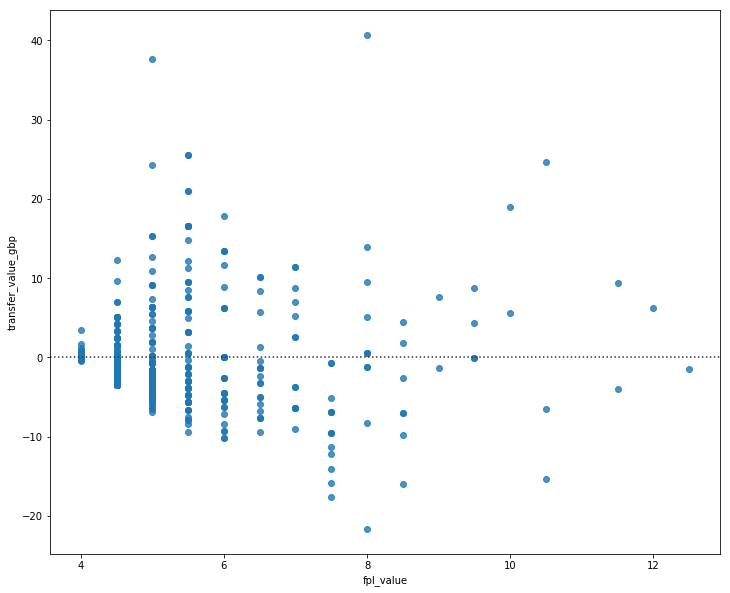

In [0]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(epl_players_df['fpl_value'], epl_players_df['transfer_value_gbp'])
plt.show()

## Distribution Plot
How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.

One way to look at the fit of the model is by looking at the distribution plot: We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

First, let's make a prediction.

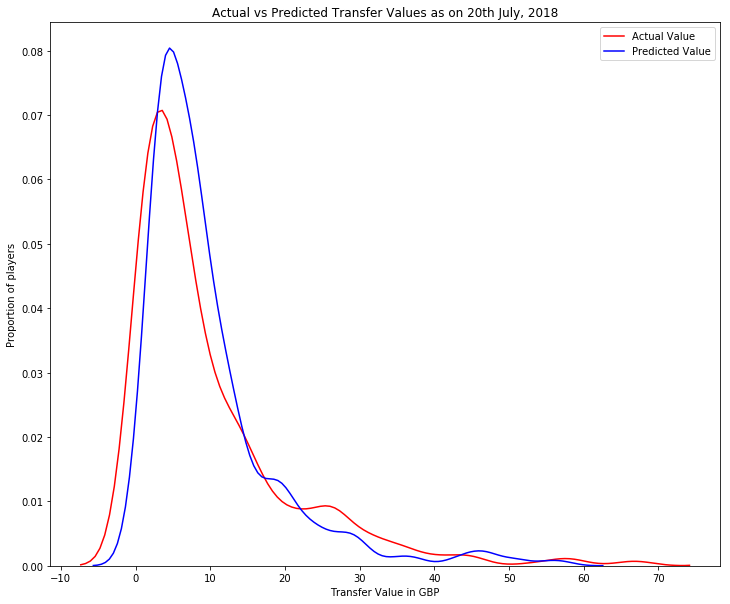

In [0]:
Yhat = linear_model.predict(Z)


plt.figure(figsize=(width, height))

ax1 = sns.distplot(epl_players_df['transfer_value_gbp'], hist=False, color='r', label='Actual Value')
sns.distplot(Yhat, hist=False, color='b', label='Predicted Value', ax=ax1)


plt.title('Actual vs Predicted Transfer Values as on 20th July, 2018')
plt.xlabel('Transfer Value in GBP')
plt.ylabel('Proportion of players')

plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.

## Polynomial Regression
Polynomial regression is a particular case of the general linear regression model or multiple linear regression models.

We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.

We will use the following function to plot the data:

In [0]:
def polynomial_plot(model, independent_variable, dependent_variable, name):
    x_new = np.linspace(4, 8, 12)
    y_new = model(x_new)
    
    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title('Polynomial fit with Matplotlib for Transfer Value ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(name)
    plt.ylabel('Transfer Value')
    
    plt.show()
    plt.close()

Let's fit the polynomial using the function `numpy.polyfit`, then use the function `numpy.poly1d` to display the polynomial function.

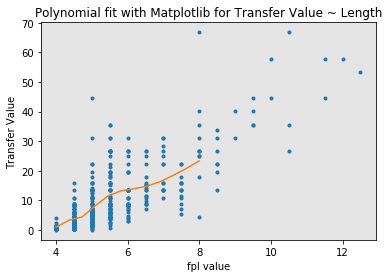

In [0]:
x = epl_players_df['fpl_value']
y = epl_players_df['transfer_value_gbp']

f = np.polyfit(x, y, 11)
p = np.poly1d(f)

polynomial_plot(p, x, y, 'fpl value')

## Multivariative Polynomial Regression
The analytical expression for Multivariate Polynomial function gets complicated.

We can perform a polynomial transform on multiple features. First, we import the module:

In [0]:
from sklearn.preprocessing import PolynomialFeatures


pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [0]:
Z_pr = pr.fit_transform(Z)
print(f'Original data shape: {Z.shape}')
print(f'After transformation: {Z_pr.shape}')

Original data shape: (461, 3)
After transformation: (461, 10)


## Pipeline
Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline.

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

We create the pipeline, by creating a list of tuples including the name of the model or estimator and its corresponding constructor.

In [0]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe = Pipeline(Input)
pipe

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])


We can normalize the data, perform a transform and fit the model simultaneously.

In [0]:
pipe.fit(Z,y)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])


Similarly, we can normalize the data, perform a transform and produce a prediction simultaneously

In [0]:
ypipe=pipe.predict(Z)
ypipe[0:4]

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([56.40775034, 35.42494035, 21.14565057, 20.62792266])

## Measures for In-Sample Evaluation
When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.

Two very important measures that are often used in Statistics to determine the accuracy of a model are:

*   R^2 / R-squared
*   Mean Squared Error (MSE)

**R-squared**

R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.

The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

**Mean Squared Error (MSE)**

The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).

### Model 1: Simple Linear Regression

Let's calculate the R^2

In [0]:
linear_model.fit(X, Y)
r_squared_1 = linear_model.score(X, Y)
print('The R-square is:', r_squared_1)

The R-square is: 0.54709177486828


We can say that ~ 54.709% of the variation of the transfer value is explained by this simple linear model.

Let's calculate the MSE

In [0]:
from sklearn.metrics import mean_squared_error as m2e


Yhat = linear_model.predict(X)
mse_1 = m2e(epl_players_df['transfer_value_gbp'], Yhat)
print('The mean squared error of price and predicted value is:', mse_1)

The mean squared error of price and predicted value is: 53.831234387601384


### Model 2: Multiple Linear Regression

In [0]:
linear_model.fit(Z, epl_players_df['transfer_value_gbp'])
r_squared_2 = linear_model.score(Z, epl_players_df['transfer_value_gbp'])
print('The R-square is:', r_squared_2)

The R-square is: 0.7064406913579686


In [0]:
mse_2 = m2e(epl_players_df['transfer_value_gbp'], linear_model.predict(Z))
print('The mean squared error of price and predicted value is:', mse_2)

The mean squared error of price and predicted value is: 34.89152784888262


### Model 3: Polynomial Linear Regression

In [0]:
from sklearn.metrics import r2_score


r_squared_3 = r2_score(epl_players_df['transfer_value_gbp'], p(x))
print('The R-squared is:', r_squared_3)

The R-squared is: 0.6389217308820434


In [0]:
mse_3 = m2e(epl_players_df['transfer_value_gbp'], p(x))
print('The mean squared error is:', mse_3)

The mean squared error is: 42.91661722748611


### Comparing Results from Different Models
Now let's make a simple visualization of extracted metrics.

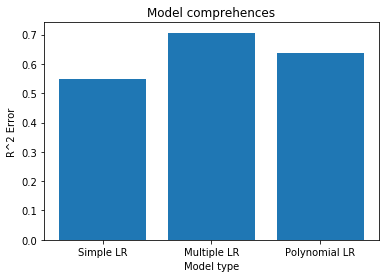

In [0]:
r_squared_list = [r_squared_1, r_squared_2, r_squared_3]
plt.bar([i for i in range(1, len(r_squared_list) + 1)], r_squared_list, tick_label=['Simple LR', 'Multiple LR', 'Polynomial LR'])
plt.xlabel("Model type")
plt.ylabel("R^2 Error")
plt.title("Model comprehences")
plt.show()
plt.close()

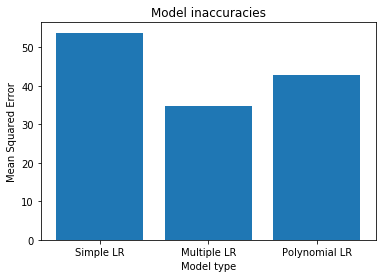

In [0]:
mse_list = [mse_1, mse_2, mse_3]
plt.bar([i for i in range(1, len(mse_list) + 1)], mse_list, tick_label=['Simple LR', 'Multiple LR', 'Polynomial LR'])
plt.xlabel("Model type")
plt.ylabel("Mean Squared Error")
plt.title("Model inaccuracies")
plt.show()
plt.close()

# Step 5: Model Evaluation and Refinement


First lets only use numeric data.

In [0]:
epl_players_df = epl_players_df._get_numeric_data()
epl_players_df

,age,position_cat,transfer_value_gbp,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,...,CM,DM,GK,LB,LM,LW,RB,RM,RW,SS
0,28,1,57.8760,4329,12.0,264,3.0,0,4,1,...,0,0,0,0,0,1,0,0,0,0
1,28,1,44.5200,4395,9.5,167,2.0,0,4,1,...,0,0,0,0,0,0,0,0,0,0
2,35,4,6.2328,1529,5.5,134,2.0,0,6,1,...,0,0,1,0,0,0,0,0,0,0
3,28,1,17.8080,2393,7.5,122,1.0,0,4,1,...,0,0,0,0,0,0,0,0,1,0
4,31,3,19.5888,912,6.0,121,2.0,0,4,1,...,0,0,0,0,0,0,0,0,0,0
5,22,3,26.7120,1675,6.0,119,2.0,0,2,1,...,0,0,0,0,0,0,1,0,0,0
6,30,1,19.5888,2230,8.5,116,2.0,0,4,1,...,0,0,0,0,0,0,0,0,0,0
7,31,3,11.5752,555,5.5,115,2.0,0,4,1,...,0,0,0,1,0,0,0,0,0,0
8,25,3,26.7120,1877,5.5,90,2.0,0,3,1,...,0,0,0,0,0,0,0,0,0,0
9,21,1,8.9040,1812,5.5,89,4.0,0,1,1,...,0,0,0,0,0,1,0,0,0,0


Libraries for plotting.

In [0]:
%%capture
! pip install ipywidgets

In [0]:
from IPython.display import display
import ipywidgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

In [0]:
def distribution_plot(red_function, blue_function, red_name, blue_name, title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(red_function, hist=False, color="r", label=red_name)
    ax2 = sns.distplot(blue_function, hist=False, color="b", label=blue_name, ax=ax1)

    plt.title(title)
    plt.xlabel('Transfer Value (in GBP)')
    plt.ylabel('Proportion of Players')

    plt.show()
    plt.close()

In [0]:
def polynomial_plot(x_train, x_test, y_train, y_test, lr, poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    x_max = max([x_train.values.max(), x_test.values.max()])

    x_min = min([x_train.values.min(), x_test.values.min()])

    x = np.arange(x_min, x_max, 0.1)


    plt.plot(x_train, y_train, 'ro', label='Training Data')
    plt.plot(x_test, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-1, 150])
    plt.ylabel('Transfer value')
    plt.legend()

## Training and Testing
An important step in testing your model is to split your data into training and testing data.

In [0]:
y_data = epl_players_df['transfer_value_gbp']
x_data = epl_players_df.drop('transfer_value_gbp', axis=1)

Now we randomly split our data into training and testing data using the function `train_test_split`.

In [0]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 70
number of training samples: 391


In [0]:
lre = LinearRegression()
lre.fit(x_train[['page_views']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Let's calculate the R^2 on the test data.

In [0]:
lre.score(x_test[['page_views']], y_test)

0.26216152861785014

And on the test data.

In [0]:
lre.score(x_train[['page_views']], y_train)

0.5701452914539652

Same stuff with  90% training data.

In [0]:
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_data, y_data, random_state=0, test_size=0.10)
print('number of test samples:', x_test_2.shape[0])
print('number of training samples:', x_train_2.shape[0])
lr1 = LinearRegression()
lr1.fit(x_train_2[['page_views']], y_train_2)
print('R^2 on test data:', lr1.score(x_test_2[['page_views']], y_test_2))
print('R^2 on training data:', lr1.score(x_train_2[['page_views']], y_train_2))

number of test samples: 47
number of training samples: 414
R^2 on test data: 0.677608022448325
R^2 on training data: 0.5377949897478105


## Cross Validation Score

In [0]:
from sklearn.model_selection import cross_val_score

We input the object, the feature in this case `page_views`, the target data `y_data`. The parameter `cv` determines the number of folds; in this case 4.

In [0]:
Rcross = cross_val_score(lre, x_data[['page_views']], y_data, cv=4)
Rcross
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.4497933391963805 and the standard deviation is 0.2207104314498913


## Overfitting, Underfitting, and Model Selection
It turns out that the test data sometimes referred to as the out of sample data is a much better measure of how well your model performs in the real world. One reason for this is overfitting; let's go over some examples. It turns out these differences are more apparent in Multiple Linear Regression and Polynomial Regression so we will explore overfitting in that context.

In [0]:
lr = LinearRegression()
lr.fit(x_train[['page_views', 'fpl_value', 'fpl_points', 'age']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
yhat_train = lr.predict(x_train[['page_views', 'fpl_value', 'fpl_points', 'age']])
yhat_train[0:5]

array([ 2.48756879,  9.27233492,  5.07067376, 48.31111382, 36.19736268])

In [0]:
yhat_test = lr.predict(x_test[['page_views', 'fpl_value', 'fpl_points', 'age']])
yhat_test[0:5]

array([16.74375507, 18.94432186, 13.00230764,  4.63031356,  1.67870938])

Let's perform some model evaluation using our training and testing data separately. First we import the seaborn and matplotlibb library for plotting.

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

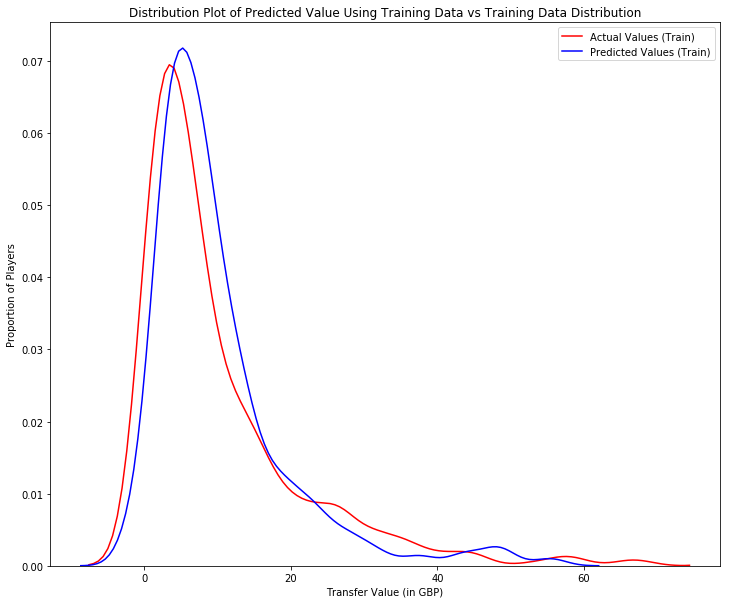

In [0]:
title = 'Distribution Plot of Predicted Value Using Training Data vs Training Data Distribution'
distribution_plot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", title)

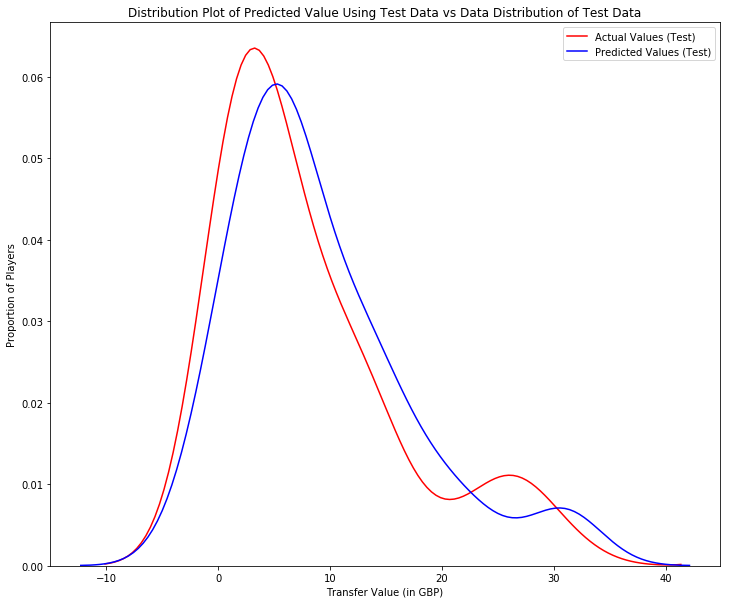

In [0]:
Title='Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
distribution_plot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Let's see if polynomial regression makes the prediction accuracy when analysing the test dataset better.

In [0]:
from sklearn.preprocessing import PolynomialFeatures

### Overfitting
Overfitting occurs when the model fits the noise, not the underlying process. Therefore when testing your model using the test-set, your model does not perform as well as it is modelling noise, not the underlying process that generated the relationship. Let's create a degree 5 polynomial model.

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['page_views']])
x_test_pr = pr.fit_transform(x_test[['page_views']])
pr

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)

Now let's create a linear regression model `poly` and train it.

In [0]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
yhat = poly.predict(x_test_pr)
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 7.81106728  6.81545612 11.51113862  3.31119666]
True values: [13.356   4.452  15.1368  1.3356]


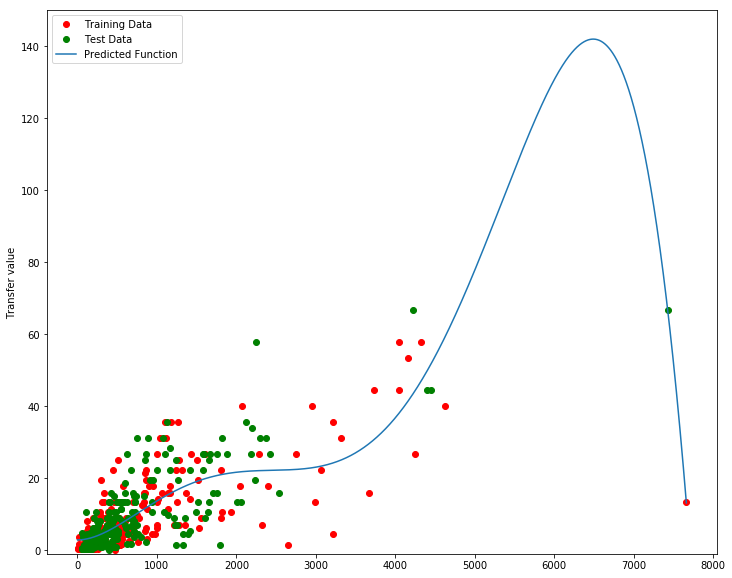

In [0]:
polynomial_plot(x_train[['page_views']], x_test[['page_views']], y_train, y_test, poly, pr)

R^2 of the training data:

In [0]:
poly.score(x_train_pr, y_train)

0.629191121427741

R^2 of the test data:

In [0]:
poly.score(x_test_pr, y_test)

0.6135715822566024

Let's see how the R^2 changes on the test data for different order polynomials and plot the results:

Text(3, 0.75, 'Maximum R^2 ')

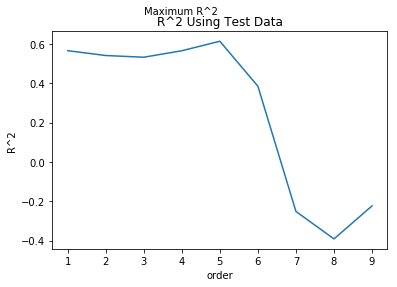

In [0]:
Rsqu_test = []

order = [1, 2, 3, 4, 5, 6, 7, 8, 9]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['page_views']])
    
    x_test_pr = pr.fit_transform(x_test[['page_views']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

In [0]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['page_views']])
    x_test_pr = pr.fit_transform(x_test[['page_views']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    polynomial_plot(x_train[['page_views']], x_test[['page_views']], y_train,y_test, poly, pr)

In [0]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f>

## Ridge Regression
In this section, we will review Ridge Regression we will see how the parameter Alfa changes the model. Just a note here our test data will be used as validation data.

In [0]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train[['page_views', 'fpl_value', 'fpl_points', 'age']])
x_test_pr = pr.fit_transform(x_test[['page_views', 'fpl_value', 'fpl_points', 'age']])

In [0]:
from sklearn.linear_model import Ridge

Let's create a Ridge regression object, setting the regularization parameter to 0.1

In [0]:
RigeModel=Ridge(alpha=0.1)
RigeModel.fit(x_train_pr, y_train)
yhat = RigeModel.predict(x_test_pr)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.57563e-17): result may not be accurate.
  overwrite_a=True).T


In [0]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [15.89224555  7.07073352 15.2084125   3.25421298]
test set : [13.356   4.452  15.1368  1.3356]


In [0]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = 10 * np.array(range(0,1000))
for alfa in ALFA:
    RigeModel = Ridge(alpha=alfa) 
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

We can plot out the value of R^2 for different Alphas

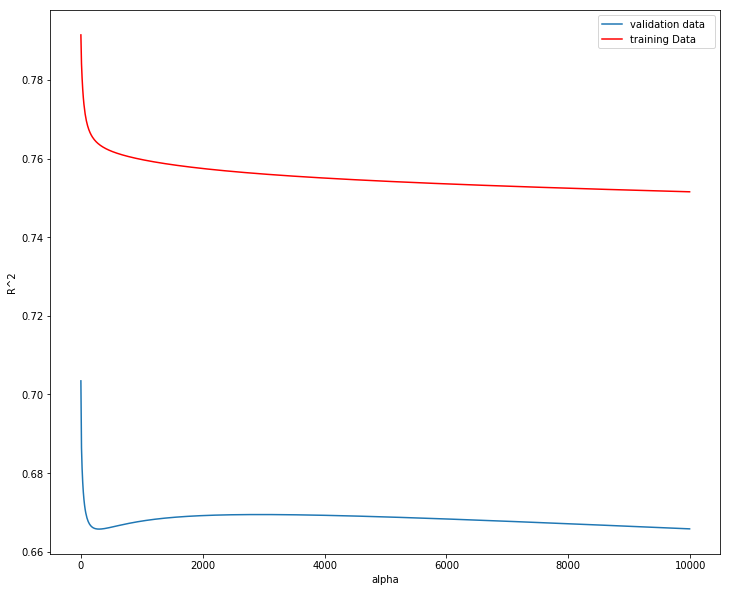

In [0]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(ALFA,Rsqu_test, label='validation data  ')
plt.plot(ALFA,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

## Grid Search
The term Alfa is a hyperparameter, `sklearn` has the class `GridSearchCV` to make the process of finding the best hyperparameter simpler.

Let's import `GridSearchCV` from the module `model_selection`.

In [0]:
from sklearn.model_selection import GridSearchCV


parameters1 = [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
RR = Ridge()

# Create a ridge grid search object
Grid1 = GridSearchCV(RR, parameters1,cv=4)
# Fit the model
Grid1.fit(x_data[['page_views', 'fpl_value', 'fpl_points', 'age']], y_data)

# The object finds the best parameter values on the validation data.
BestRR=Grid1.best_estimator_
BestRR.score(x_test[['page_views', 'fpl_value', 'fpl_points', 'age']], y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.7158574115327072